In [1]:
import scanpy as sc
import anndata
import os
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

import importlib
import sys


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
adata=sc.read_h5ad("/analysis_objects/all_grans_nodubs.h5ad")


In [3]:
plt.rcParams["figure.figsize"] = (6,6)


In [6]:
cdc_adata = ph.new_adata_from_raw(adata, ["cDC"],cluster_key="General Celltypes")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [7]:
sc.pp.highly_variable_genes(cdc_adata, n_top_genes=2000,batch_key="sample") 
cdc_adata =cdc_adata[:,cdc_adata.var["highly_variable"]]

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_c

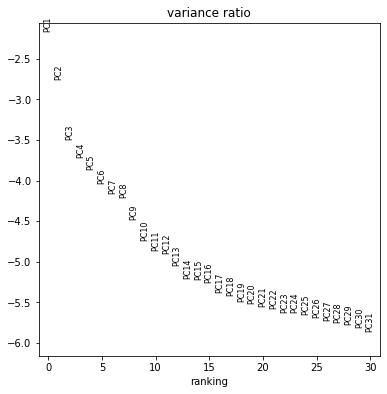

In [8]:
sc.tl.pca(cdc_adata , svd_solver='arpack')
sc.pl.pca_variance_ratio(cdc_adata , log=True)

In [9]:
#hh.pc_heatmap(cdc_adata, pc_use = list(range(0,11)), n_cells = 200)

In [10]:
sc.pp.neighbors(cdc_adata , n_neighbors=10, n_pcs=20)

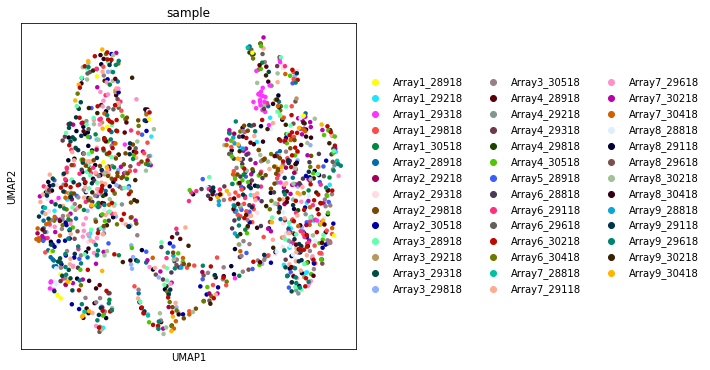

In [11]:
sc.tl.umap(cdc_adata)
sc.pl.umap(cdc_adata , color="sample")

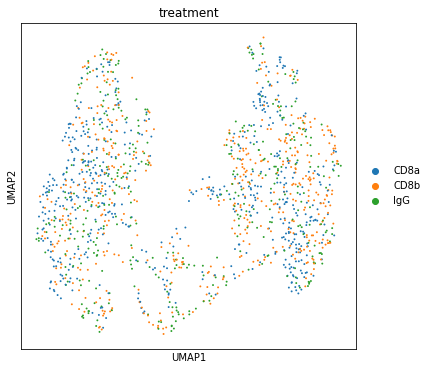

In [12]:
sc.pl.umap(cdc_adata , color="treatment",size=15)

In [13]:
sc.tl.leiden(cdc_adata, resolution=.07)

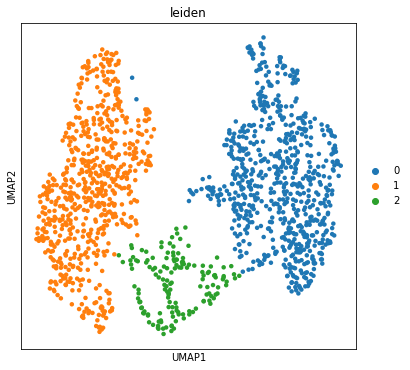

In [14]:
sc.pl.umap(cdc_adata,color="leiden")

In [15]:
sc.tl.rank_genes_groups(cdc_adata, groupby="leiden")

In [16]:
cluster_names = {"0":"DC1","1":"DC2","2":"DC1"}

In [22]:
cdc_adata.write_h5ad("cdc_subclustered.h5ad")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'cDC clusters' as categorical


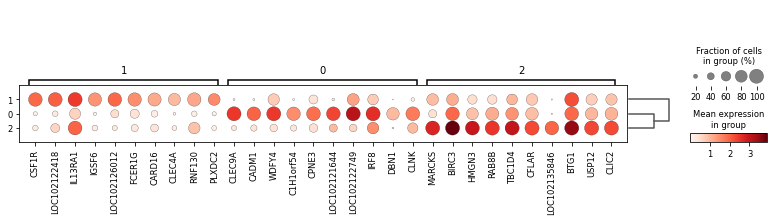

In [21]:
sc.pl.rank_genes_groups_dotplot(cdc_adata)

In [21]:
cdc_adata.obs["cDC clusters"] = cdc_adata.obs["leiden"].map(cluster_names)

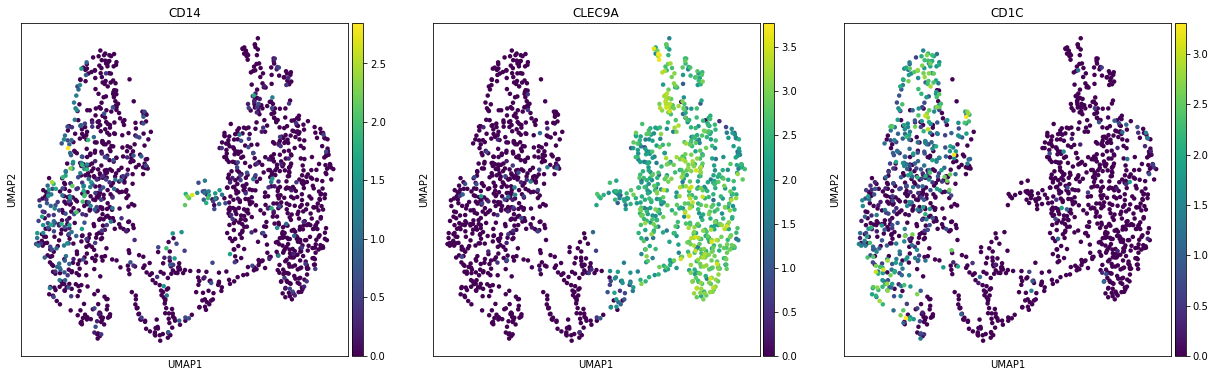

In [19]:
sc.pl.umap(cdc_adata,color=["CD14","CLEC9A","CD1C"])

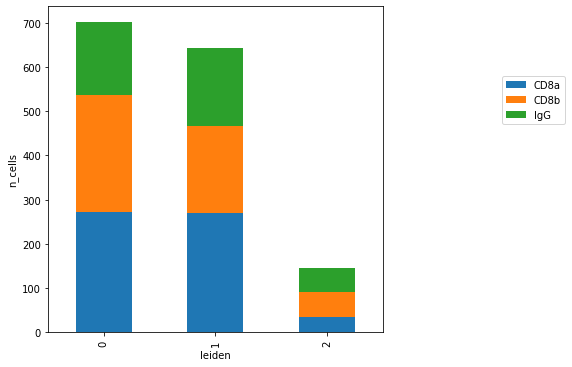

In [33]:
hh.stacked_bar_plot(cdc_adata, "leiden","treatment")

In [17]:
import condition_plotting_helpers as cph

In [47]:
import figure_making_plots as fmp


In [15]:
import figure_making_plots as fmp
fmp.correct_all_adata_colors(cdc_adata)

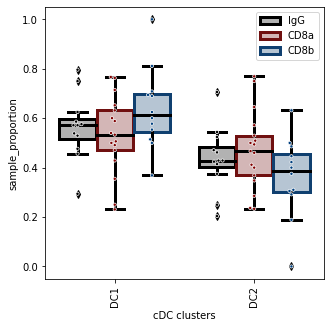

In [50]:
cph.boxplot_sample_proportions(cdc_adata,"sample", "cDC clusters","treatment",hue_order=["IgG","CD8a","CD8b"],edgecolor=True,figsize=(5, 5))
plt.savefig("cdc_proportion_boxplot.pdf")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'cDC clusters' as categorical


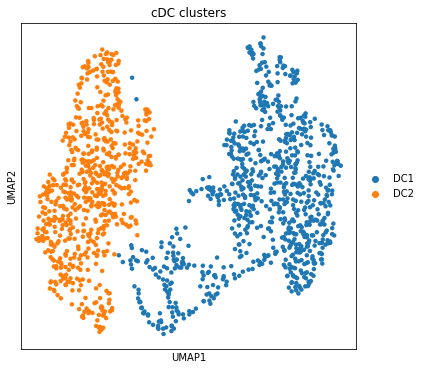

In [27]:
sc.pl.umap(cdc_adata,color="cDC clusters")

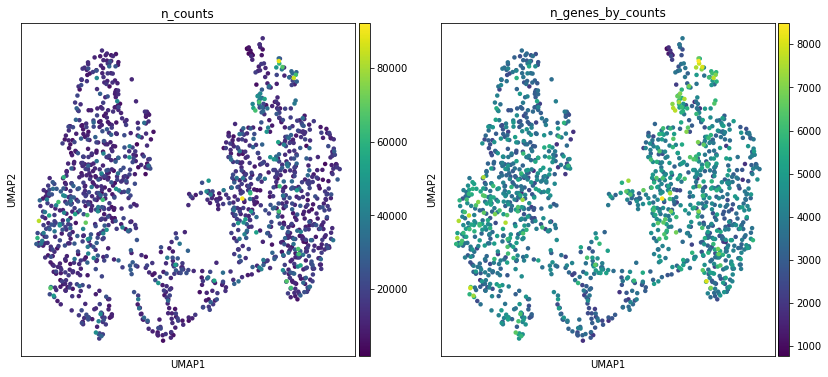

In [35]:
sc.pl.umap(cdc_adata,color=["n_counts","n_genes_by_counts"])

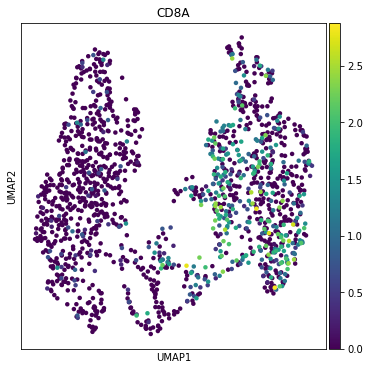

In [29]:
sc.pl.umap(cdc_adata,color=["CD8A"])

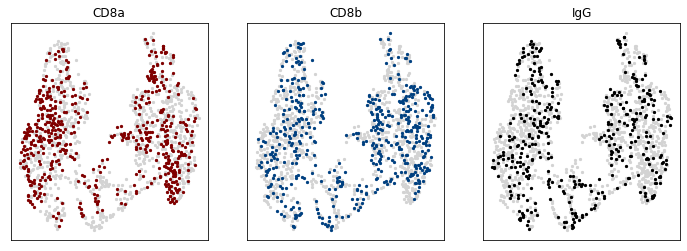

In [40]:
ph.split_umap_by_category(cdc_adata,"treatment",colorby="treatment",markersize=5)
plt.savefig("cdc_umap_by_treatment.pdf",bbox_inches="tight")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


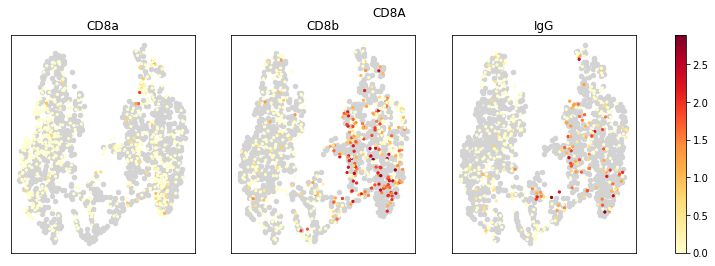

In [45]:
ph.split_umap_by_category(cdc_adata,"treatment",gene="CD8A",markersize=20,gene_cmap='YlOrRd')
plt.savefig("CD8A_by_category_cdc.pdf",bbox_inches="tight")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


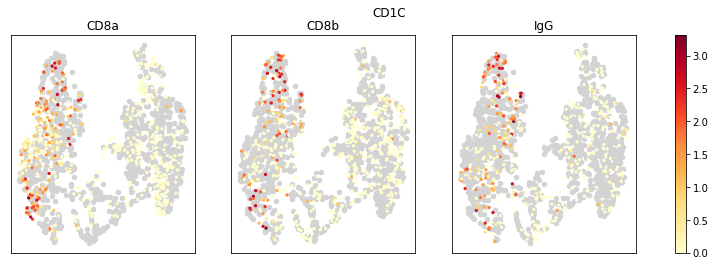

In [46]:
ph.split_umap_by_category(cdc_adata,"treatment",gene="CD1C",markersize=20,gene_cmap='YlOrRd')
plt.savefig("CD1C_by_category_cdc.pdf",bbox_inches="tight")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


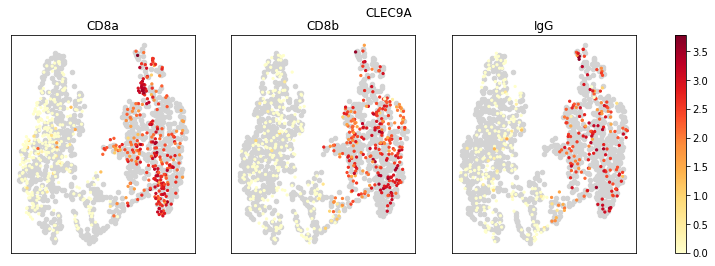

In [44]:
ph.split_umap_by_category(cdc_adata,"treatment",gene="CLEC9A",markersize=20,gene_cmap='YlOrRd')
plt.savefig("CLEC9A_by_category_cdc.pdf",bbox_inches="tight")

In [23]:
import figure_making_plots as fmp
concat_adata=sc.read_h5ad("analysis_objects/all_data_raw_countfiltered.h5ad")
cdc_pseudobulk_counts = fmp.save_pseudobulk_counts(concat_adata,cdc_adata.obs,"cDC clusters")
cdc_adata.obs["M.Number"]= cdc_adata.obs["M.Number"].astype(str)
cdc_adata.obs["monkey_condition_categories"] = cdc_adata.obs["M.Number"].map({"28918":"1","29218":"2","29318":"3","29118":"4","30518":"1","28818":"2","30218":"3","29818":"1","29618":"2","30418":"3"})
cdc_meta = fmp.save_metadata_for_pseudobulk_deseq(cdc_adata.obs[['sample','M.Number', 'treatment','Gran State',"monkey_condition_categories","cDC clusters"]],"cDC clusters")

cdc_pseudobulk_counts.to_csv("cdc_subset_pseudobulk_counts.csv")
cdc_meta.to_csv("cdc_subset_meta.csv")

/data/cb/scratch/nyquist/deeper_sequencing_analysis/figure_making_plots.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_metadata[grp_name] = [processed_metadata.loc[i,celltype_col]+"_"+processed_metadata.loc[i,sample_col] for i in processed_metadata.index]
/data/cb/scratch/nyquist/deeper_sequencing_analysis/figure_making_plots.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_metadata[c] = processed_metadata[c].astype(str)
